# PyBer

## dependencies and data

In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
city_data = pd.read_csv("resources/city_data.csv")
ride_data = pd.read_csv("resources/ride_data.csv")

In [5]:
print(len(city_data))
city_data.head()

120


,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [6]:
print(len(ride_data))
ride_data.head()

2375


,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344


## 5.2.4: explore the data in Pandas

In [7]:
# city data: count the number of columns and rows that are not null

city_data.count() # 120 values per column

city            120
driver_count    120
type            120
dtype: int64

In [8]:
# get the columns and rows that are null

city_data.isnull().sum() # no missing values

city            0
driver_count    0
type            0
dtype: int64

In [9]:
# get the data type of each column
    # need to be sure 'driver_count' is numeric so we can perform calculations

city_data.dtypes # driver_count = int64, good

city            object
driver_count     int64
type            object
dtype: object

In [10]:
# get all unique values of city types

city_data["type"].unique() # 3 types

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [11]:
# get the number of data points from urban cities

sum(city_data["type"] == "Urban")

66

In [12]:
# ride data: get the columns and rows that are not null

ride_data.count() # 2375 rows per column

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [13]:
# get the columns and rows that are null

ride_data.isnull().sum() # no null values

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [14]:
# get data types for each column

ride_data.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [15]:
# merge dataframes

pyber_df = pd.merge(ride_data, city_data, how = "left", on = ["city", "city"])

print(len(pyber_df))
pyber_df.head()

2375


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## 5.3.1: Create dataframes for each city type

In [16]:
# new dataframe for each type

urban_df = pyber_df[pyber_df["type"] == "Urban"]
suburb_df = pyber_df[pyber_df["type"] == "Suburban"]
rural_df = pyber_df[pyber_df["type"] == "Rural"]

## 5.3.2: Get the number of rides for each city type

In [17]:
urban_ride_count = urban_df.groupby(["city"]).count()["ride_id"]
suburb_ride_count = suburb_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_df.groupby(["city"]).count()["ride_id"]

## 5.3.3: Average fare for each city type

In [18]:
urban_avg_fare = urban_df.groupby(["city"]).mean()["fare"]
suburb_avg_fare = suburb_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_df.groupby(["city"]).mean()["fare"]

## 5.3.4: Average number of drivers per city type

In [19]:
urban_avg_drivers = urban_df.groupby(["city"]).mean()["driver_count"]
suburb_avg_drivers = suburb_df.groupby(["city"]).mean()["driver_count"]
rural_avg_drivers = rural_df.groupby(["city"]).mean()["driver_count"]

## 5.3.5: Create bubble charts

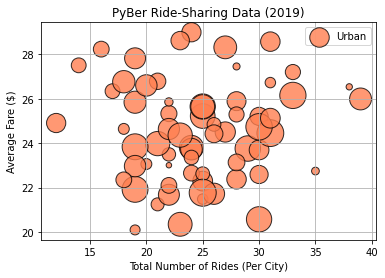

In [35]:
# urban cities

plt.scatter(urban_ride_count,urban_avg_fare,
      s = 10*urban_avg_drivers, c = "coral",
      edgecolor = "black", linewidths = 1,
      alpha = 0.8, label = "Urban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()

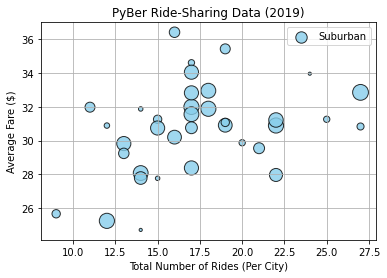

In [34]:
# suburban cities

plt.scatter(suburb_ride_count, suburb_avg_fare,
      s=10*suburb_avg_drivers, c="skyblue",
      ec="black", lw=1,
      alpha=0.8, label="Suburban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()

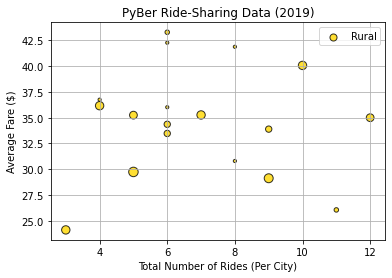

In [33]:
# rural cities

plt.scatter(rural_ride_count, rural_avg_fare,
      s=10*rural_avg_drivers, c="gold",
      ec="black", lw=1,
      alpha=0.8, label="Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()

## 5.3.6: Create a bubble chart for all cities

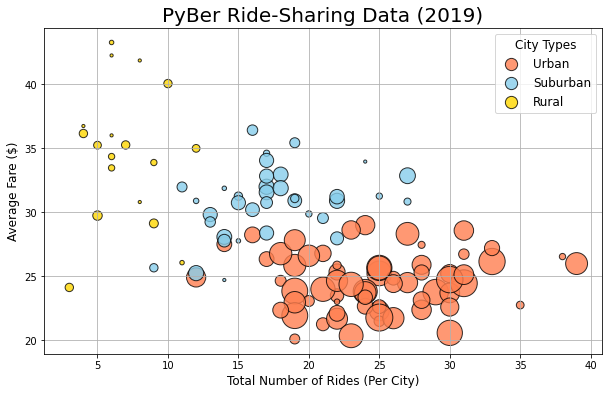

In [84]:
plt.subplots(figsize=(10, 6))

plt.scatter(urban_ride_count,urban_avg_fare,
      s = 10*urban_avg_drivers, c = "coral",
      edgecolor = "black", linewidths = 1,
      alpha = 0.8, label = "Urban")

plt.scatter(suburb_ride_count, suburb_avg_fare,
      s=10*suburb_avg_drivers, c="skyblue",
      ec="black", lw=1,
      alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count, rural_avg_fare,
      s=10*rural_avg_drivers, c="gold",
      ec="black", lw=1,
      alpha=0.8, label="Rural")

plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [150]
lgnd.legendHandles[1]._sizes = [150]
lgnd.legendHandles[2]._sizes = [150]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size.
plt.text(42, 35, f"Note: Circle size correlates \n with driver count per city.", fontsize="12")

plt.savefig("analysis/Fig1.png")

plt.show()
